In [ ]:
%load_ext autoreload
%autoreload 2

In [23]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [24]:
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD.h5ad')
adata

AnnData object with n_obs × n_vars = 11134 × 2749
    obs: 'cell_type', 'marker_ct', 'marker_ct2', 'cell_type_int'
    var: 'gene_ids', 'SYMBOL'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

### Delete unused parts of adata

In [ ]:
adata

AnnData object with n_obs × n_vars = 11134 × 2749
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T', 'cell_type', 'marker_ct', 'marker_ct2'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_thresholds', 'cell_type_colors', 'hvg', 'log1p', 'mod', 'neighbors', 'pca', 'received_ligands', 'received_ligands_tfl', 'uma

In [10]:
import sys 
sys.getsizeof(adata)

2596098695

In [ ]:
del adata.obsp
del adata.varm

for key in ['_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'hvg', 'log1p', 'mod', 'neighbors', 'pca', 'umap']:
    del adata.uns[key]

for key in ['feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'MT_gene', 'highly_variable', 'means', 'dispersions', 'dispersions_norm']:
    del adata.var[key]

for key in ['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T']:
    del adata.obs[key]

for key in ['MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'stds_cell_abundance_w_sf']:
    del adata.obsm[key]

sys.getsizeof(adata)


469820472

In [17]:
import sys
sys.path.append('../../src/')

from spaceoracle.tools.network import encode_labels


2025-05-22 10:32:40.077871: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/crc/install/gcc-12.2.0/fftw/3.3.10/lib:/ihome/crc/install/gcc-12.2.0/glpk/5.0/lib:/ihome/crc/install/gcc-12.2.0/proj/4.9.3/lib:/ihome/crc/install/gcc-12.2.0/gdal/2.4.4/lib:/ihome/crc/install/gcc-12.2.0/netcdf/4.8.1/lib:/ihome/crc/install/gcc-12.2.0/hdf5/1.14.0/lib:/ihome/crc/install/gcc-12.2.0/jags/4.3.2/lib:/ihome/crc/install/gcc-12.2.0/gsl/2.7.1/lib:/ihome/c

In [18]:
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')
adata.obs['cell_type_int'] = adata.obs['cell_type'].apply(
    lambda x: encode_labels(adata.obs['cell_type'], reverse_dict=True)[x])

adata


AnnData object with n_obs × n_vars = 11134 × 2749
    obs: 'cell_type', 'marker_ct', 'marker_ct2', 'cell_type_int'
    var: 'gene_ids', 'SYMBOL'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [19]:
adata.write_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD.h5ad')

### Run CO

In [29]:
adata.X

<11134x2749 sparse matrix of type '<class 'numpy.float32'>'
	with 4605641 stored elements in Compressed Sparse Column format>

In [33]:
adata.X = adata.layers['raw_count'].toarray().copy()

ccr4 = adata[:, 'Ccr4'].to_df()
prdm1 = adata[:, 'Prdm1'].to_df()

ccr4_pos = ccr4[ccr4['Ccr4'] > 0]
prdm1_pos = prdm1[prdm1['Prdm1'] > 0]  # Fixed column name from 'Ccr4' to 'Prdm1'

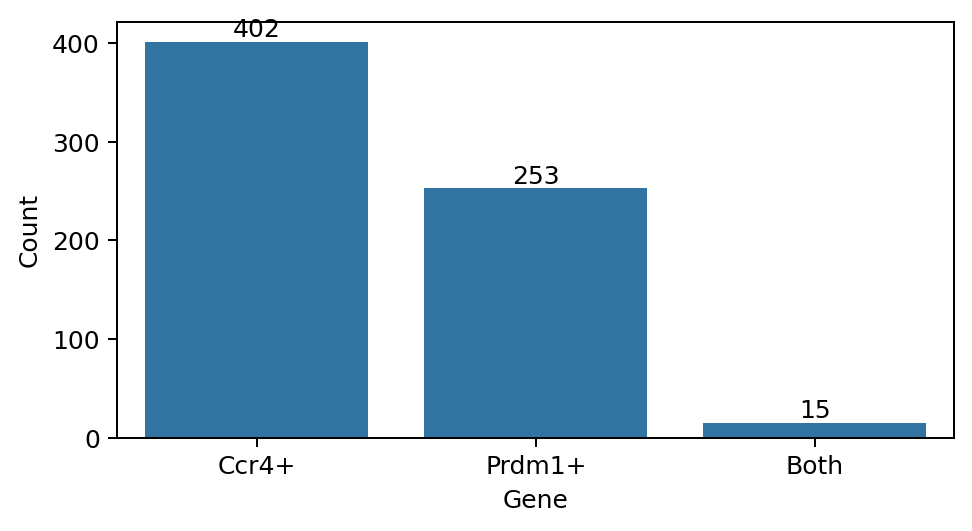

In [39]:
import seaborn as sns 

plt.figure(figsize=(6,3))
ax = sns.barplot(
    data=pd.DataFrame({
        'Gene': ['Ccr4+', 'Prdm1+', 'Both'],
        'Count': [
            len(ccr4_pos),
            len(prdm1_pos),
            len(ccr4_pos.index.intersection(prdm1_pos.index))
        ]
    }),
    x='Gene',
    y='Count'
)

# Add count labels on top of bars
for i, v in enumerate(ax.patches):
    ax.text(v.get_x() + v.get_width()/2, v.get_height(), 
            str(int(v.get_height())), 
            ha='center', va='bottom')


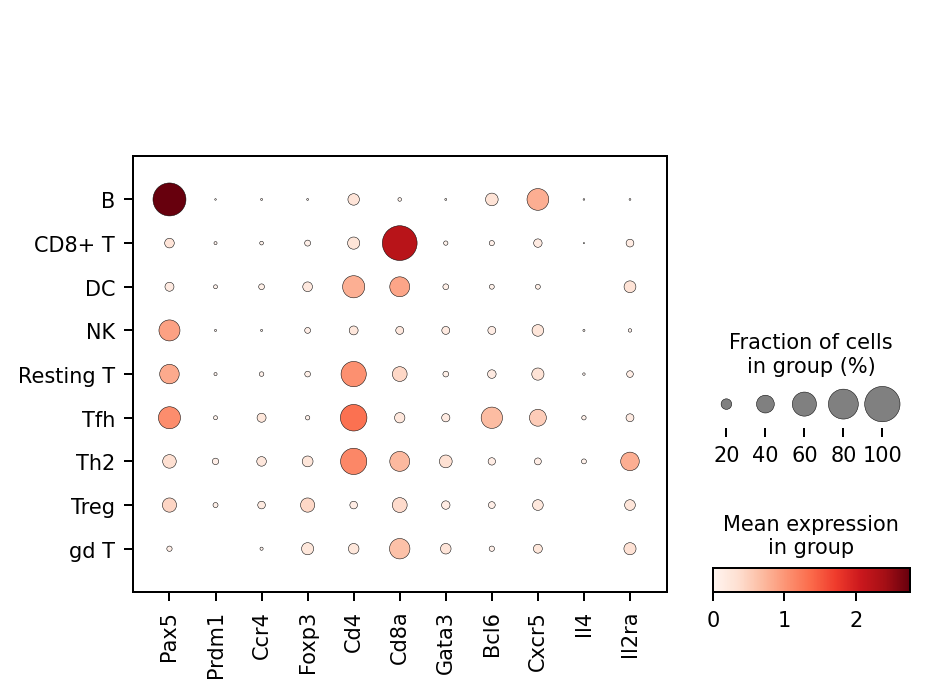

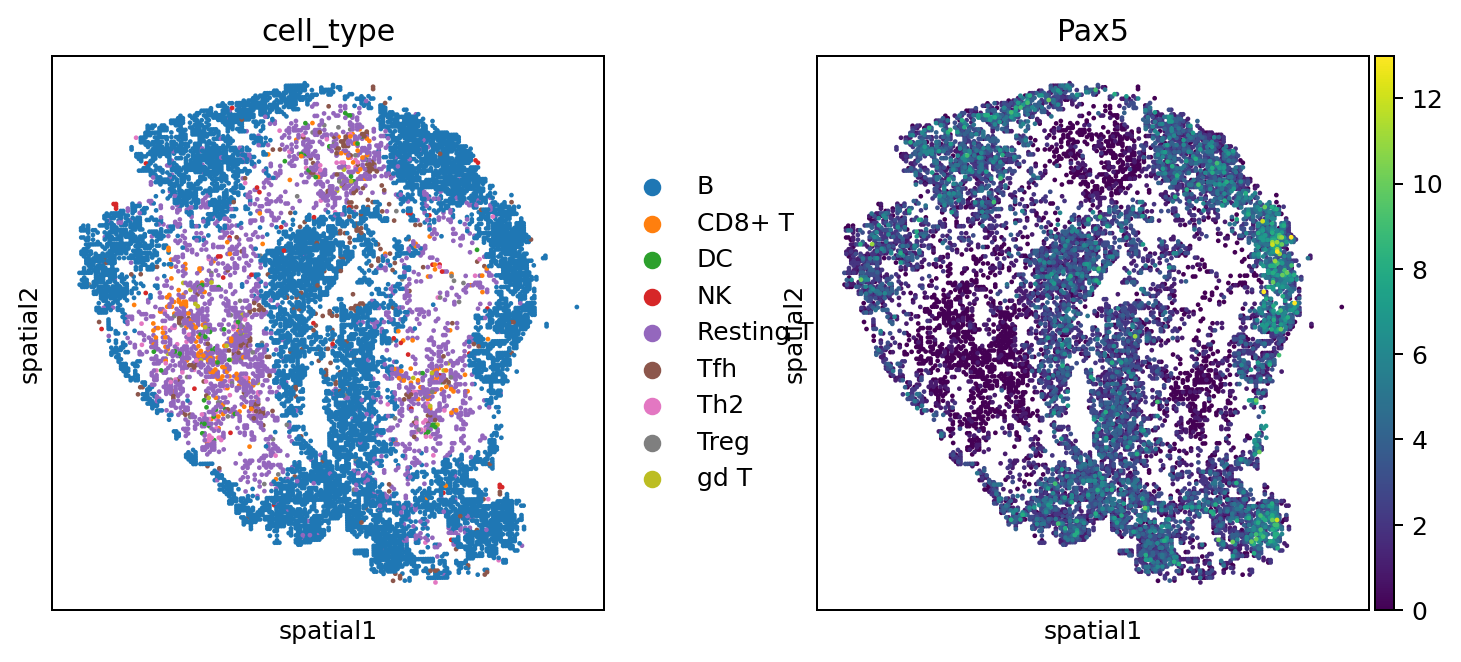

cell_type
B            8255
Resting T    2148
Tfh           273
CD8+ T        182
Th2            97
DC             56
Treg           54
NK             44
gd T           25
Name: count, dtype: int64

In [40]:
var_names = ['Pax5', 'Prdm1','Ccr4', 'Foxp3', 'Cd4', 'Cd8a', 'Gata3', 'Bcl6', 'Cxcr5', 'Il4', 'Il2ra']

sc.pl.dotplot(adata, 
    var_names=var_names, 
    swap_axes=False,
    groupby='cell_type'
)

sc.pl.spatial(adata, color=['cell_type', 'Pax5'], spot_size=20)
adata.obs['cell_type'].value_counts()

In [41]:
import celloracle as co

%matplotlib inline
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams['figure.dpi'] = 180

### Get GRN

In [42]:
adata

AnnData object with n_obs × n_vars = 11134 × 2749
    obs: 'cell_type', 'marker_ct', 'marker_ct2', 'cell_type_int'
    var: 'gene_ids', 'SYMBOL'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

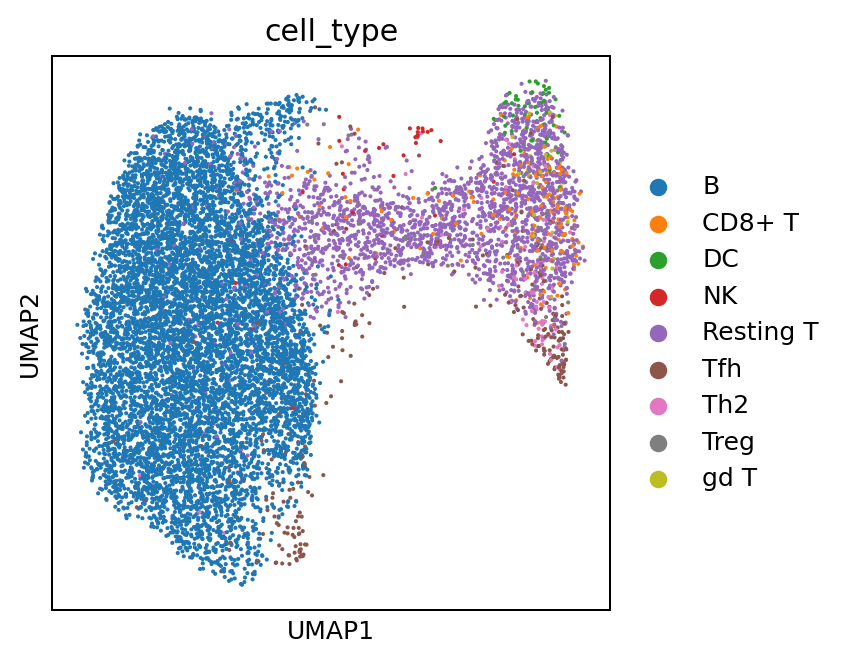

In [43]:
sc.pl.umap(adata, color='cell_type')

In [44]:
# from spaceoracle.oracles import BaseTravLR

# pcs = BaseTravLR.perform_PCA(adata)
# BaseTravLR.impute_clusterwise(adata)

In [21]:
# adata.layers['imputed_count'] = adata.layers['normalized_count'].toarray()
# adata.layers['imputed_count'] = adata.layers['imputed_count'].astype(np.float64)

In [48]:
%matplotlib inline

oracle = co.Oracle()

adata.X = adata.layers["raw_count"].copy()

oracle.import_anndata_as_raw_count(
    adata=adata,
    cluster_column_name="cell_type",
    embedding_name="X_umap"
)

oracle.pcs = [True]
oracle.k_knn_imputation = 1
oracle.knn = 1

In [49]:
base_GRN = co.data.load_mouse_promoter_base_GRN()
oracle.import_TF_data(TF_info_matrix=base_GRN)

Loading prebuilt promoter base-GRN. Version: mm10_gimmemotifsv5_fpr2


In [ ]:
%%time

links = oracle.get_links(
    cluster_name_for_GRN_unit="cell_type", 
    alpha=5,
    verbose_level=1
)

  0%|          | 0/9 [00:00<?, ?it/s]

In [14]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(
    alpha=5, 
    use_cluster_specific_TFdict=True
)

  0%|          | 0/9 [00:00<?, ?it/s]

In [15]:
import pickle

with open('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD_colinks.pkl', 'wb') as f:
    pickle.dump(links.links_dict, f)

In [16]:
links.to_hdf5(file_path="/ix/djishnu/shared/djishnu_kor11/co_objects/mouse_lymph1_visiumHD.celloracle.links")
oracle.to_hdf5("/ix/djishnu/shared/djishnu_kor11/co_objects/mouse_lymph1_visiumHD.celloracle.oracle")

### Perturb

In [7]:
oracle = co.load_hdf5("/ix/djishnu/shared/djishnu_kor11/co_objects/mouse_lymph1_visiumHD_subsampled.celloracle.oracle")
links = co.load_hdf5("/ix/djishnu/shared/djishnu_kor11/co_objects/mouse_lymph1_visiumHD_subsampled.celloracle.links")

In [8]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10, use_cluster_specific_TFdict=True)

  0%|          | 0/9 [00:00<?, ?it/s]

In [9]:
oracle.cluster_column_name

'cell_type'

In [ ]:
# oracle.adata.uns['draw_graph'] = {}
# oracle.adata.uns['draw_graph']["params"] = {}
# oracle.adata.uns['draw_graph']["params"]["layout"] = 'X_umap'

# oracle.adata.obs['draw_graph_X_umap'] = adata.obsm['X_umap']

In [10]:
goi='Pax5'

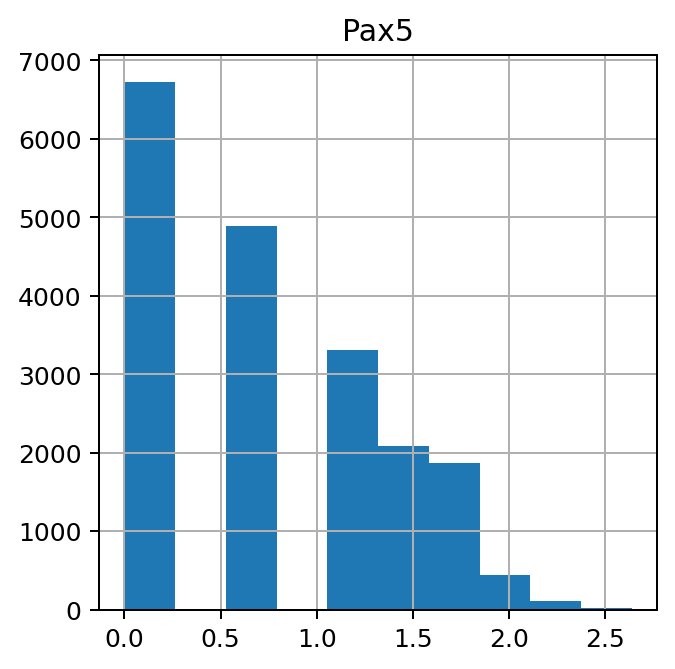

In [11]:
sc.get.obs_df(oracle.adata, keys=[goi], layer="normalized_count").hist()
plt.show()

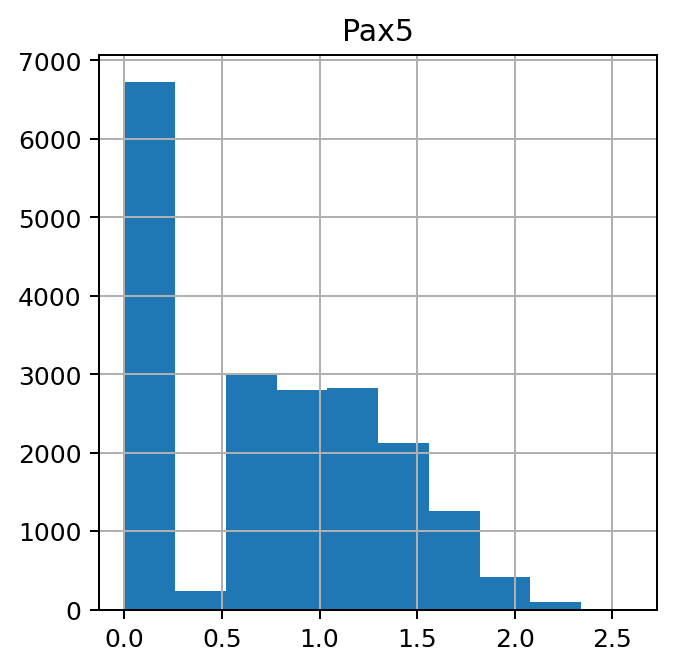

In [12]:
sc.get.obs_df(oracle.adata, keys=[goi], layer="imputed_count").hist()
plt.show()

In [13]:
# Enter perturbation conditions to simulate signal propagation after the perturbation.
oracle.simulate_shift(perturb_condition={goi: 0.0},
                      n_propagation=3)

: 

: 

In [ ]:
# Get transition probability
oracle.estimate_transition_prob(n_neighbors=200,
                                knn_random=True,
                                sampled_fraction=1)

# Calculate embedding
oracle.calculate_embedding_shift(sigma_corr=0.05)

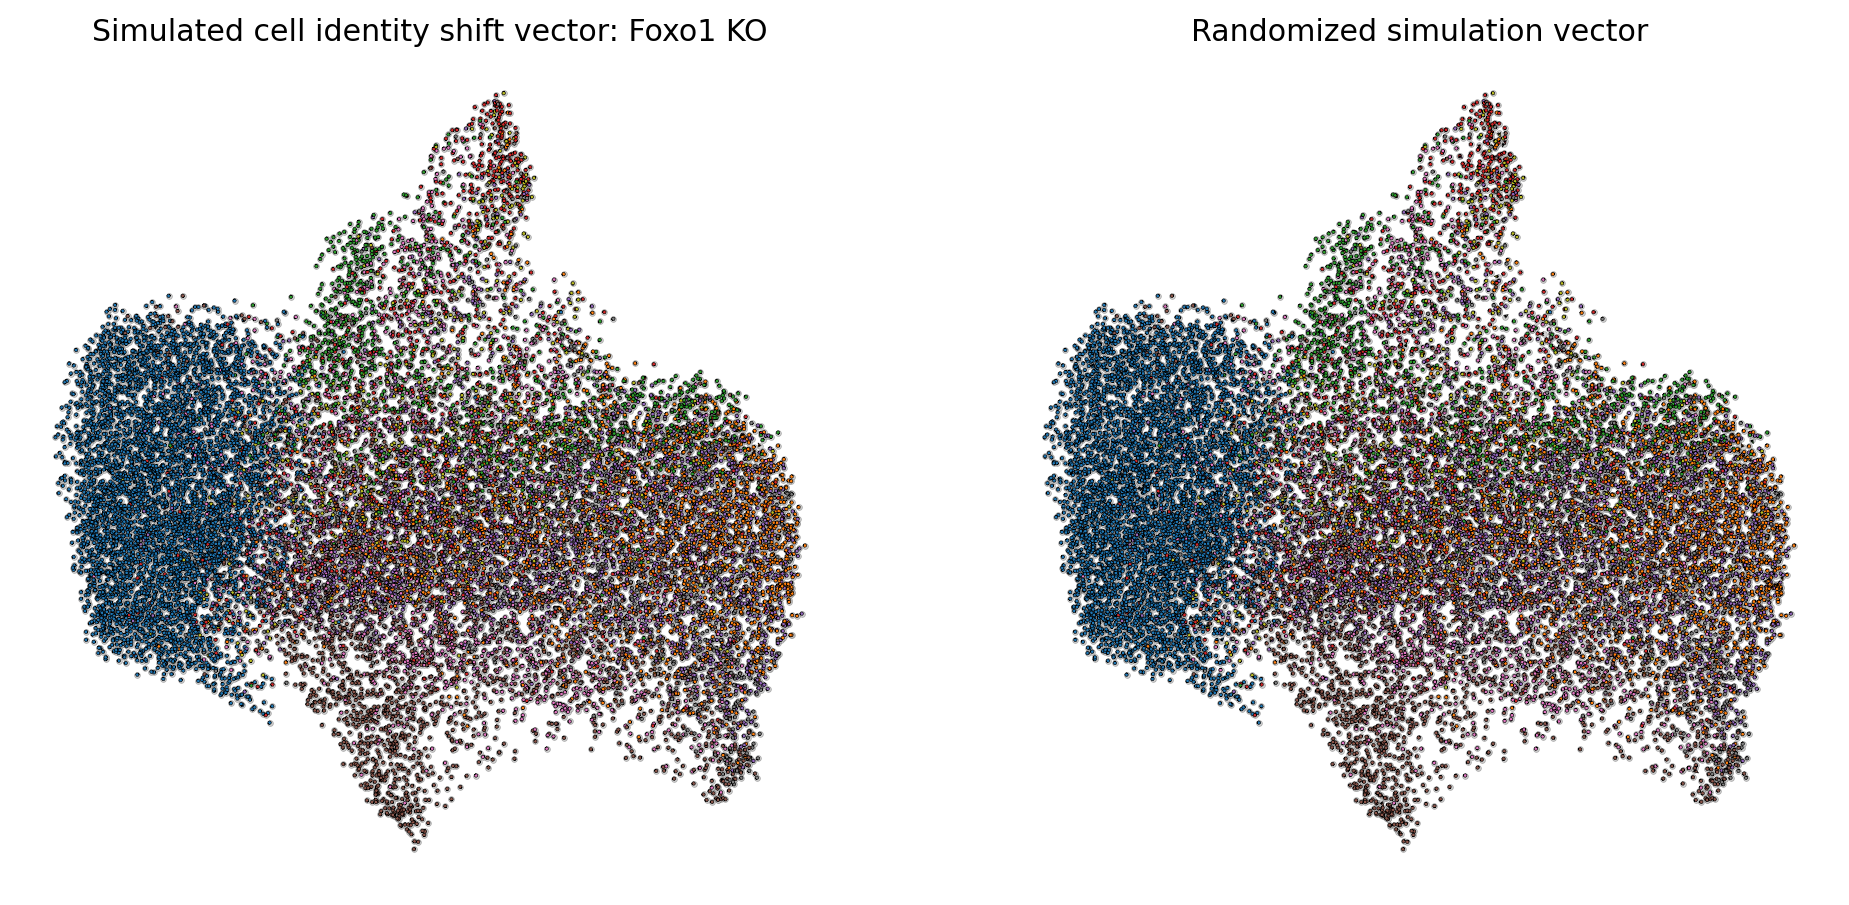

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale = 20
# Show quiver plot
oracle.plot_quiver(scale=scale, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_quiver_random(scale=scale, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

In [ ]:
# n_grid = 40 is a good starting value.
n_grid = 40
oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)

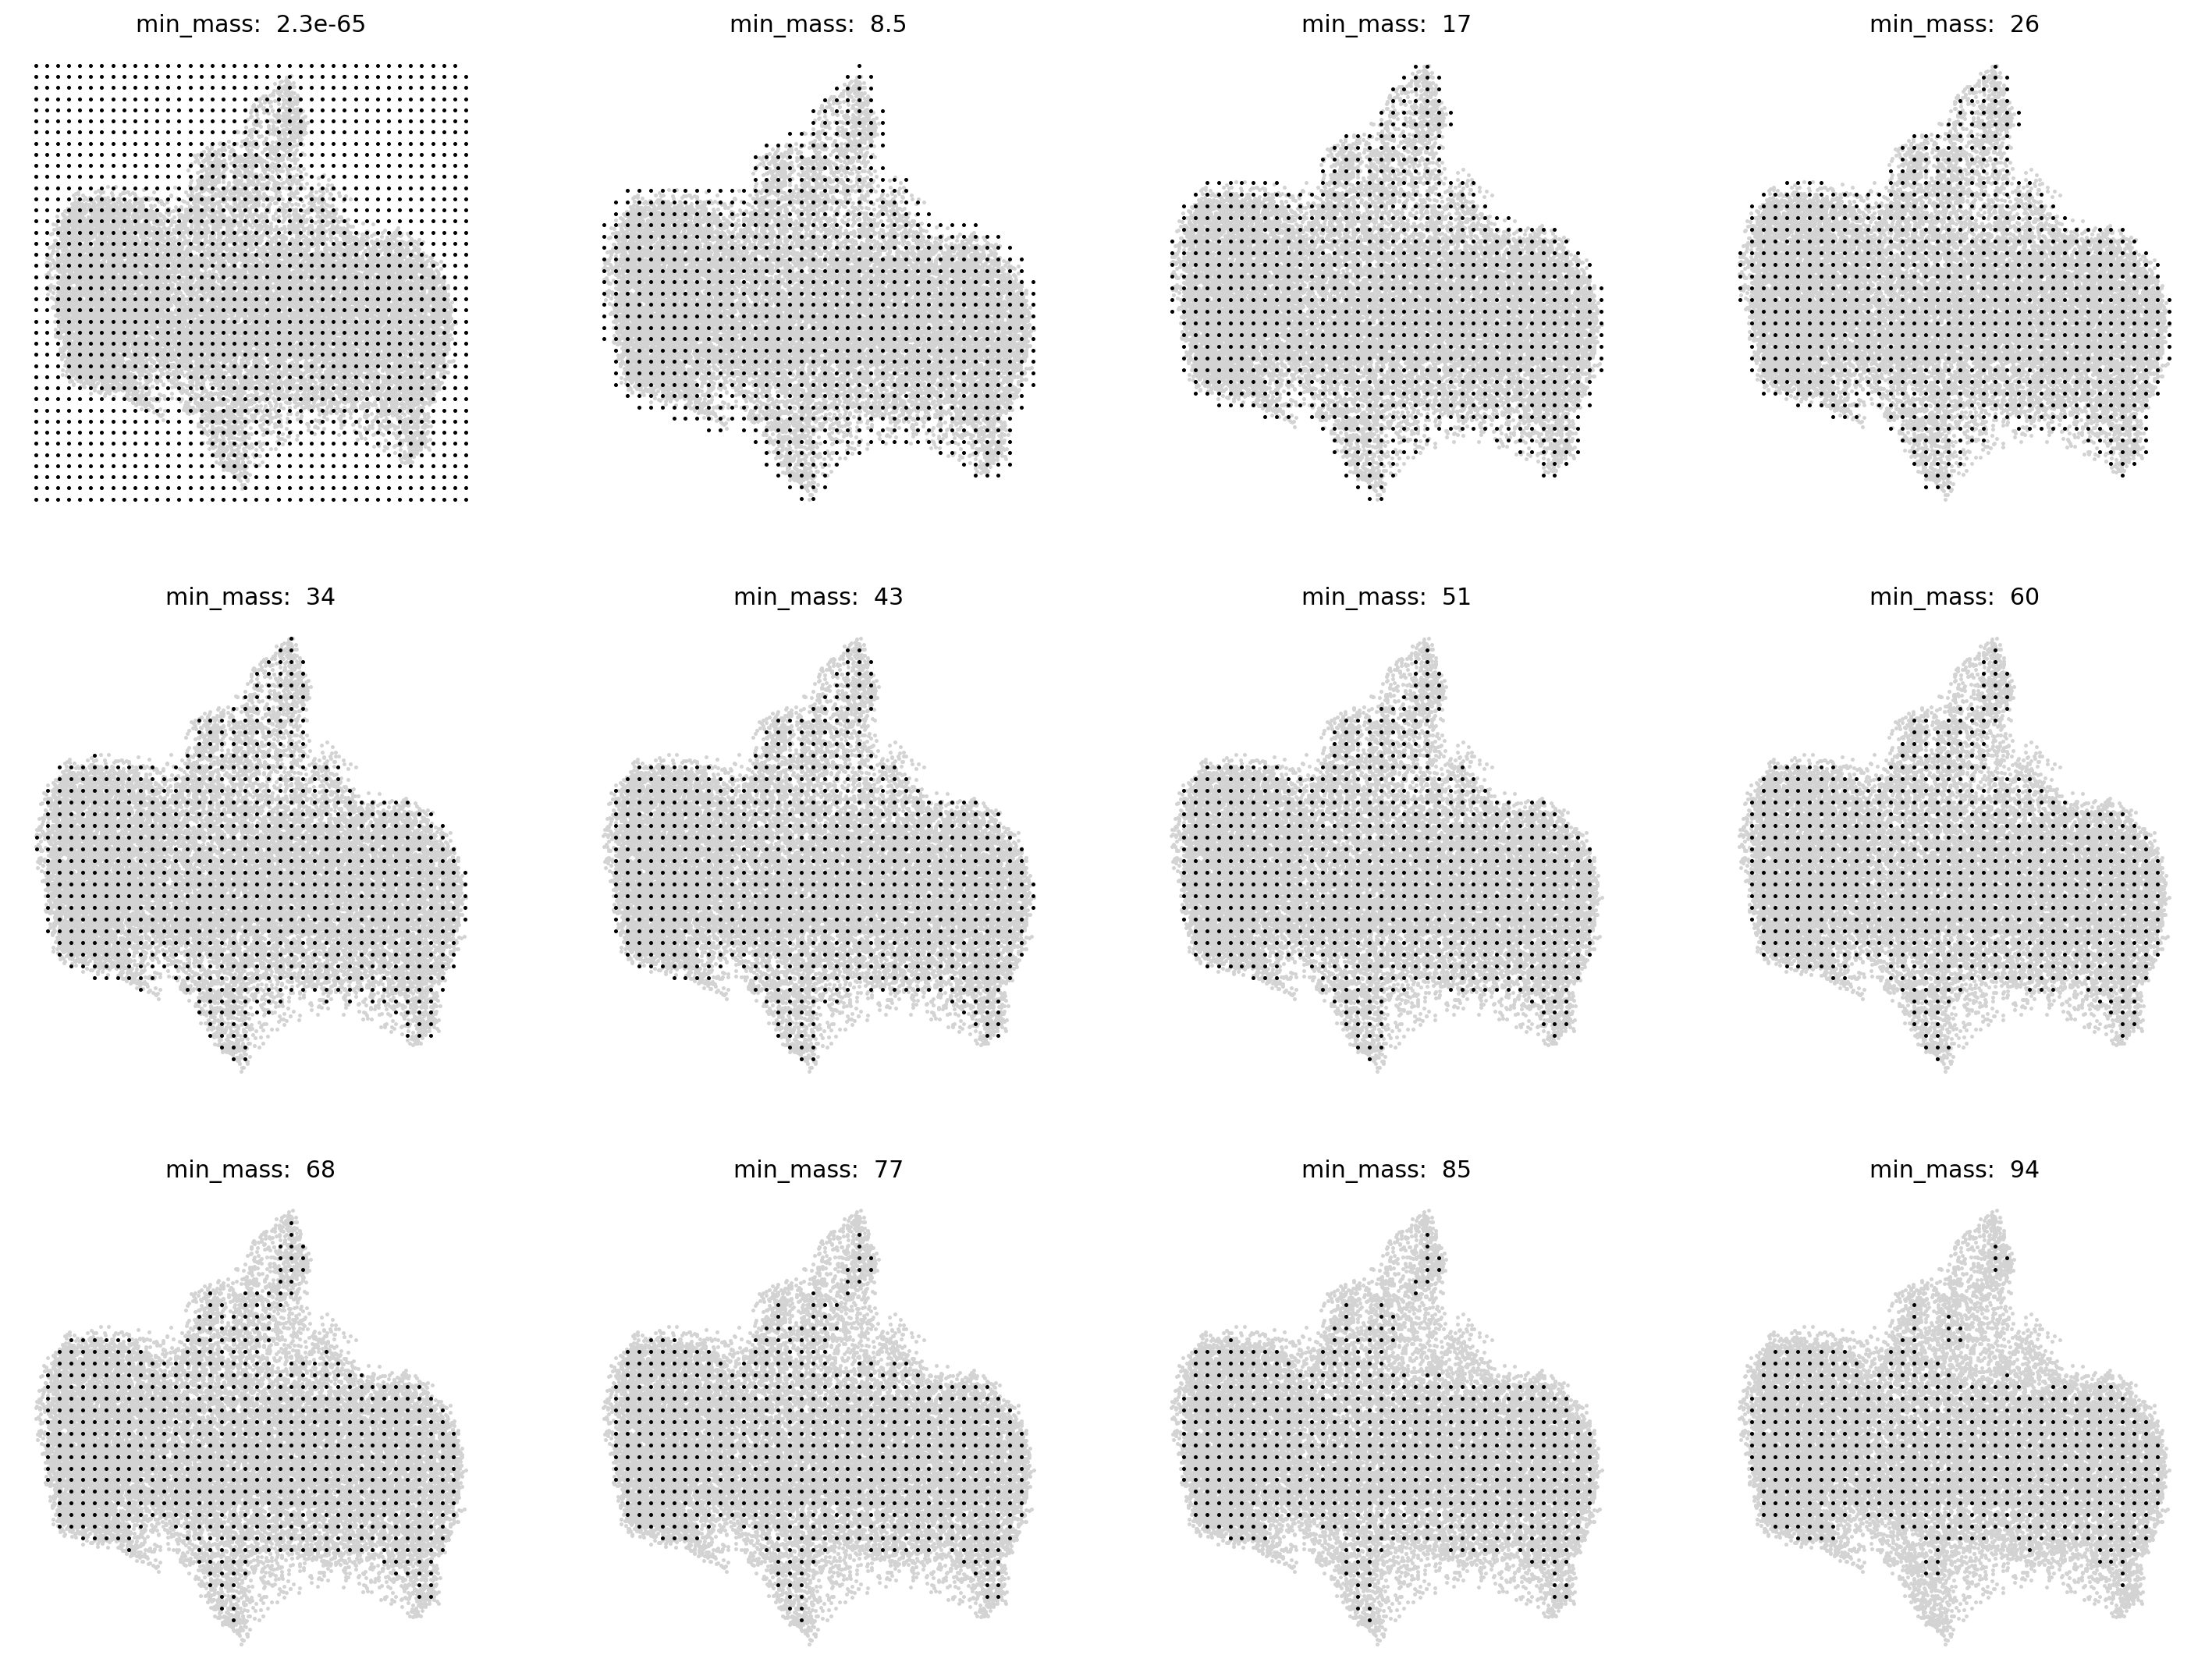

In [ ]:
# Search for best min_mass.
oracle.suggest_mass_thresholds(n_suggestion=12)

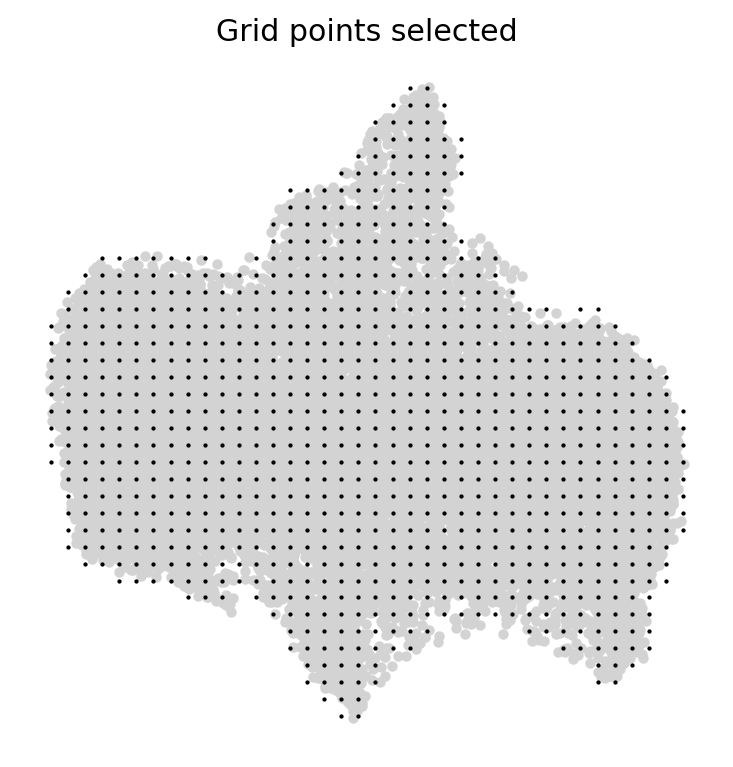

In [ ]:
min_mass = 16
oracle.calculate_mass_filter(min_mass=min_mass, plot=True)

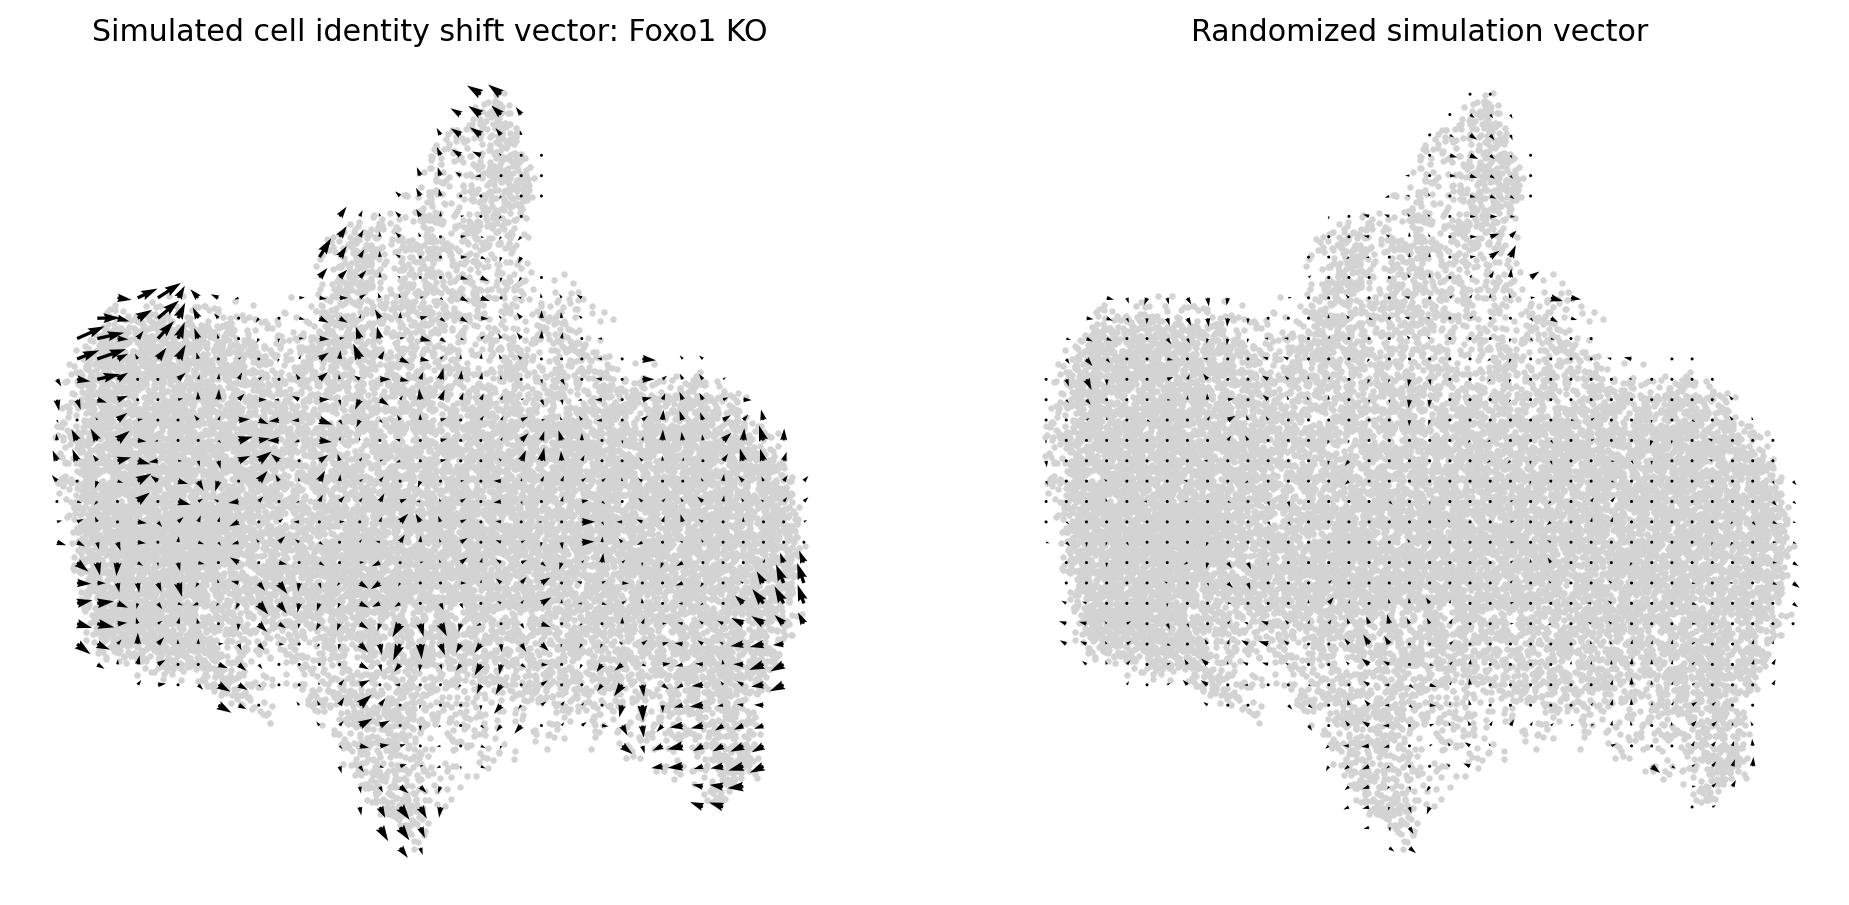

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale_simulation = 1
# Show quiver plot
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_simulation_flow_random_on_grid(scale=scale_simulation, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

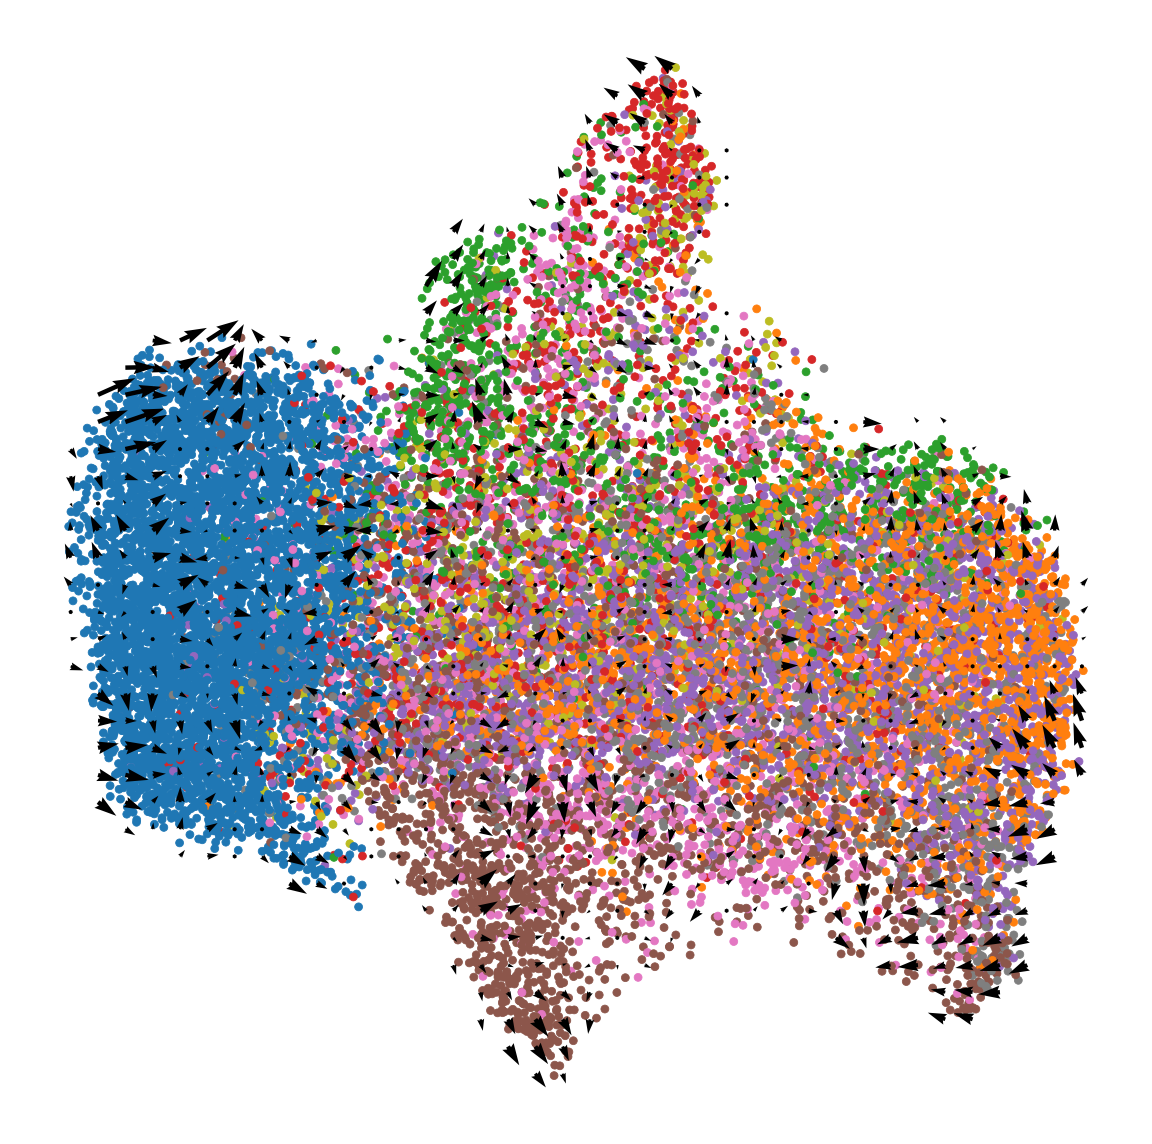

In [ ]:
# Plot vector field with cell cluster
fig, ax = plt.subplots(figsize=[8, 8])

oracle.plot_cluster_whole(ax=ax, s=10)
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax, show_background=False)